<a href="https://colab.research.google.com/github/Zheng7426/machine_learning_practice/blob/master/BinaryClassification_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [2]:
max([max(sequence) for sequence in x_train])

9999

<b>Decode review back to English words</b>

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join([reverse_word_index.get(i - 3,  '?') for i in x_train[0]])

1646592/1641221 [==============================] - 1s 0us/step


In [4]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

<b>Encoding the integer sequences into a binary matrix</b>

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [6]:
len(x_train[0])

10000

In [0]:
train_labels = y_train
test_labels = y_test

In [8]:
type(y_train)
print(y_train.dtype)

int64


In [0]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [10]:
print(type(y_train))
print(type(train_labels))
print(y_train.dtype)
print(train_labels.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float32
int64


In [11]:
x_test.shape

(25000, 10000)

**The Model Definition**

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

<b>Compilling the Model</b>

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

<b>Setting aside a validation set</b>

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


<b>Train the model</b>

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 2/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 3/20
15000/15000 [==============================] - 1s 67us/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 4/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 5/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 6/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 7/20
15000/15000 [==============================] - 1s 69us/s

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

<b>Plotting the training and validation loss</b>

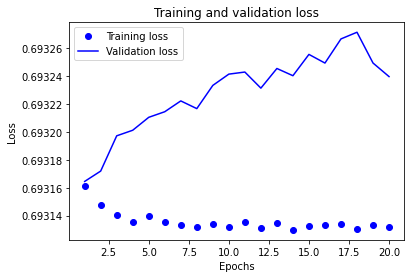

In [17]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



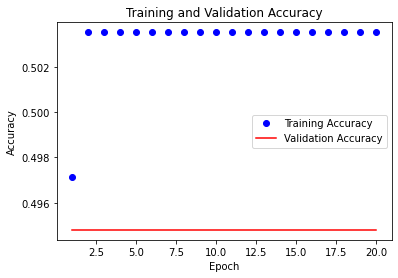

In [19]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The accuracy and loss should not be constant like shown in the graph.

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='selu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.6937 - accuracy: 0.5022
Epoch 2/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.6936 - accuracy: 0.4989
Epoch 3/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.5056
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step


In [31]:
results

[0.6932055638694763, 0.4999600052833557]

In [32]:
model.predict(x_test)

array([[0.86408347],
       [0.49824885],
       [0.49824885],
       ...,
       [0.49824885],
       [0.49824885],
       [0.49824885]], dtype=float32)

In [33]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])